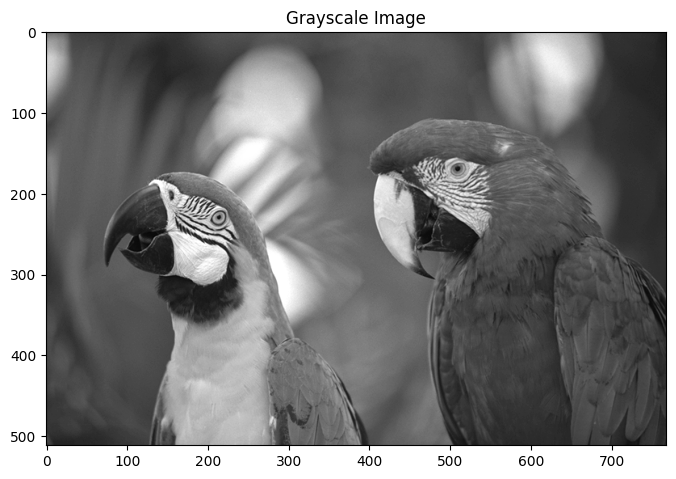

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Read image and convert to grayscale
img = Image.open("Image-1.png")
img_array = np.array(img)

# Plot the grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(img_array, cmap='gray')
plt.title('Grayscale Image')
plt.show()

#### **Adding One-pixel Padding**

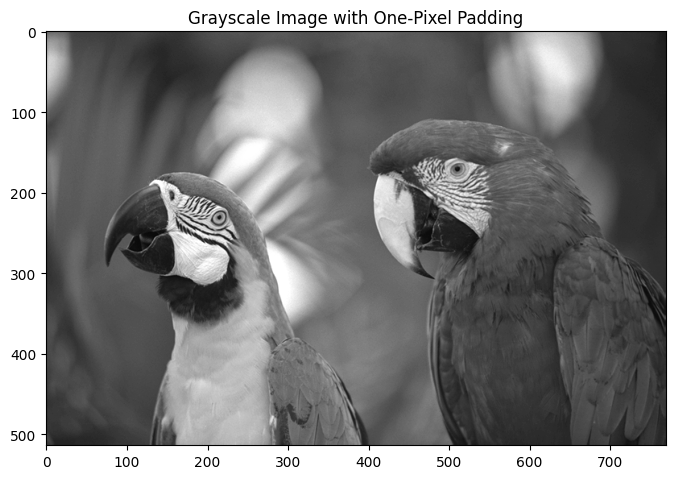

In [ ]:
# Add one-pixel padding by duplicating border pixels
height, width = img_array.shape
padded_img = np.zeros((height + 2, width + 2), dtype=img_array.dtype)

# Copy the original image to the center
padded_img[1:-1, 1:-1] = img_array

# Pad the edges by duplicating pixels
# Top and bottom edges
padded_img[0, 1:-1] = img_array[0, :]  # Top edge
padded_img[-1, 1:-1] = img_array[-1, :]  # Bottom edge

# Left and right edges
padded_img[1:-1, 0] = img_array[:, 0]  # Left edge
padded_img[1:-1, -1] = img_array[:, -1]  # Right edge

# Corner pixels
padded_img[0, 0] = img_array[0, 0]  # Top-left
padded_img[0, -1] = img_array[0, -1]  # Top-right
padded_img[-1, 0] = img_array[-1, 0]  # Bottom-left
padded_img[-1, -1] = img_array[-1, -1]  # Bottom-right

# Plot the padded grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(padded_img, cmap='gray')
plt.title('Grayscale Image with One-Pixel Padding')
plt.show()

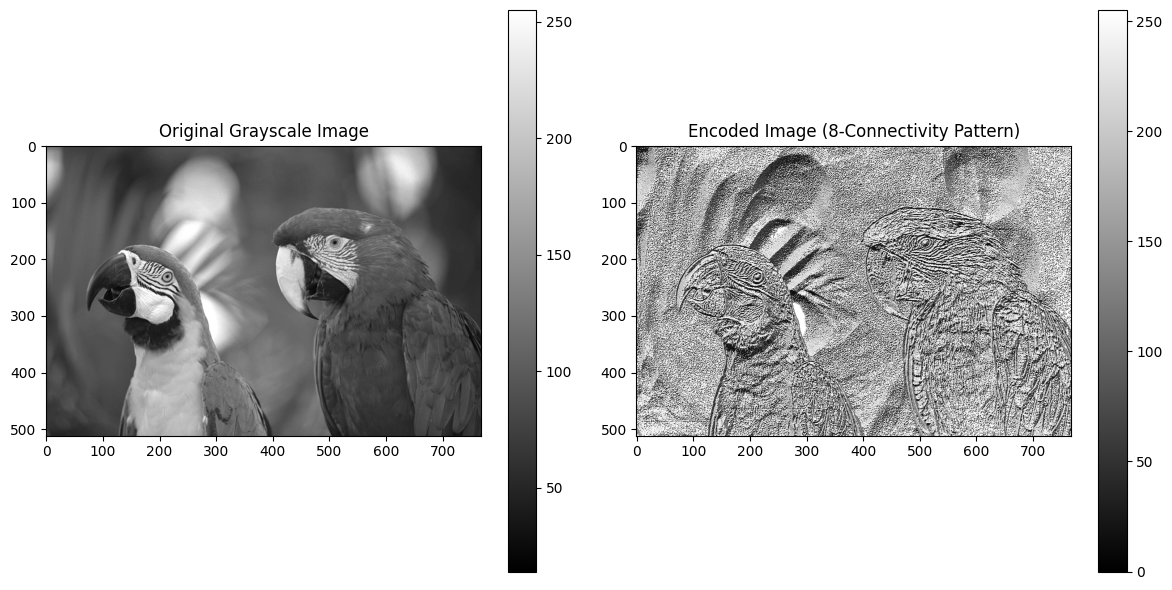

In [ ]:
# Create output image to store the encoded values
encoded_img = np.zeros_like(img_array)

# Define neighbor positions in anti-clockwise order starting from top-left
# (row offset, column offset)
neighbors = [
    (-1, -1),  # Top-left
    (-1, 0),   # Top
    (-1, 1),   # Top-right
    (0, 1),    # Right
    (1, 1),    # Bottom-right
    (1, 0),    # Bottom
    (1, -1),   # Bottom-left
    (0, -1)    # Left
]

# Process each pixel in the original image (excluding the padding)
for i in range(1, height + 1):
    for j in range(1, width + 1):
        center_pixel = padded_img[i, j]
        binary_string = ""
        
        # Check each neighbor in anti-clockwise order
        for di, dj in neighbors:
            neighbor_pixel = padded_img[i + di, j + dj]
            
            # Calculate difference and convert to binary (0 or 1)
            # If difference is negative, set to 0; otherwise, set to 1
            diff = int(neighbor_pixel) - int(center_pixel)
            bit_value = "0" if diff < 0 else "1"            
            # Add to binary string
            binary_string += bit_value
        # Convert binary string to decimal
        decimal_value = int(binary_string, 2)
        
        # Store the encoded value in the output image
        encoded_img[i-1, j-1] = decimal_value
# Plot the original and encoded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Grayscale Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(encoded_img, cmap='gray')  # Using viridis colormap for better visualization
plt.title('Encoded Image (8-Connectivity Pattern)')
plt.colorbar()

plt.tight_layout()
plt.show()


#### **Modified One**

C:\Users\garda\AppData\Local\Temp\ipykernel_7864\4090556539.py:37: RuntimeWarning: overflow encountered in scalar subtract
  encoded_img[i-1, j-1] = + abs(2*center_pixel - decimal_value)%255
C:\Users\garda\AppData\Local\Temp\ipykernel_7864\4090556539.py:37: RuntimeWarning: overflow encountered in scalar multiply
  encoded_img[i-1, j-1] = + abs(2*center_pixel - decimal_value)%255


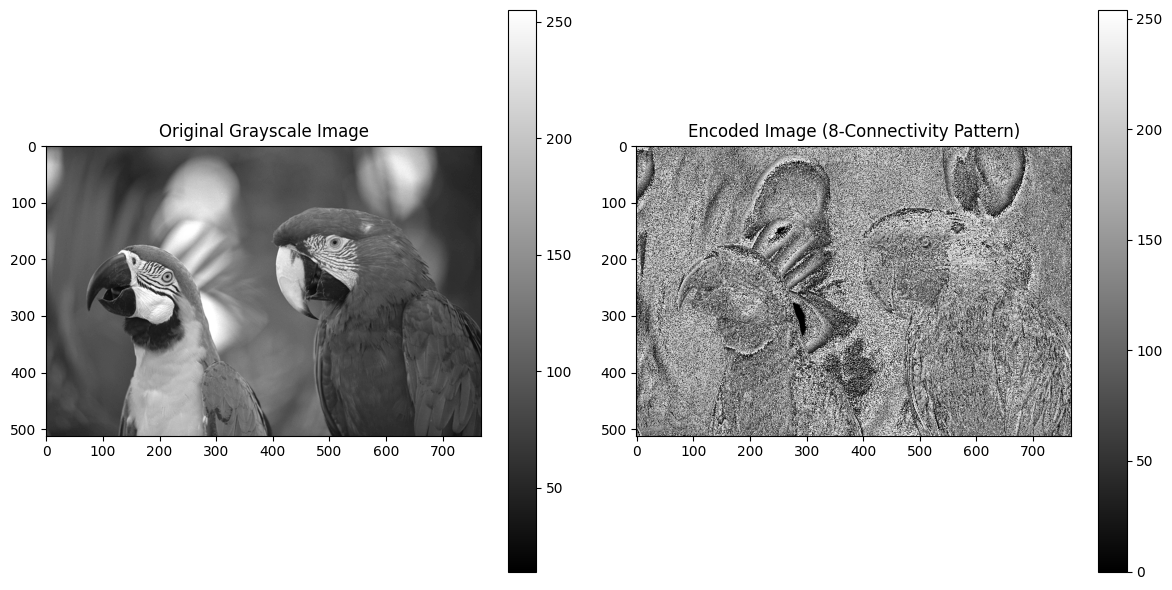

In [ ]:
# Create output image to store the encoded values
encoded_img = np.zeros_like(img_array)

# Define neighbor positions in anti-clockwise order starting from top-left
# (row offset, column offset)
neighbors = [
    (-1, -1),  # Top-left
    (-1, 0),   # Top
    (-1, 1),   # Top-right
    (0, 1),    # Right
    (1, 1),    # Bottom-right
    (1, 0),    # Bottom
    (1, -1),   # Bottom-left
    (0, -1)    # Left
]

# Process each pixel in the original image (excluding the padding)
for i in range(1, height + 1):
    for j in range(1, width + 1):
        center_pixel = padded_img[i, j]
        binary_string = ""
        
        # Check each neighbor in anti-clockwise order
        for di, dj in neighbors:
            neighbor_pixel = padded_img[i + di, j + dj]
            
            # Calculate difference and convert to binary (0 or 1)
            # If difference is negative, set to 0; otherwise, set to 1
            diff = int(neighbor_pixel) - int(center_pixel)
            bit_value = "0" if diff < 0 else "1"            
            # Add to binary string
            binary_string += bit_value
        # Convert binary string to decimal
        decimal_value = int(binary_string, 2)
        
        # Store the encoded value in the output image
        encoded_img[i-1, j-1] = center_pixel + abs(center_pixel - decimal_value)
# Plot the original and encoded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Grayscale Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(encoded_img, cmap='gray')  # Using viridis colormap for better visualization
plt.title('Encoded Image (8-Connectivity Pattern)')
plt.colorbar()

plt.tight_layout()
plt.show()
